In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('files_for_lab\csv_files\marketing_customer_analysis.csv') 

## Show DataFrame info.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

# Show DataFrame info.

In [4]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


# Show a plot of the total number of responses.

In [5]:
df['Response'].value_counts()

No     7826
Yes    1308
Name: Response, dtype: int64

(array([7826., 1308.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

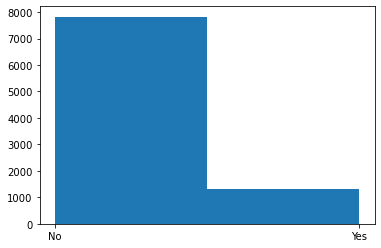

In [6]:
#for a simple Yes/No series, i think the best representation would be a bar plot.

plt.hist(df['Response'], bins=2)

#i tried to edit the axis labels, not nothing worked to make them centralized

# Show a plot of the response rate by the sales channel.

In [7]:
df['Sales Channel'].value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: Sales Channel, dtype: int64

(array([3477., 1765., 1325., 2567.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <BarContainer object of 4 artists>)

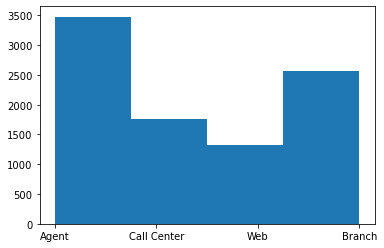

In [8]:
plt.hist(df['Sales Channel'], bins=4)

# Show a plot of the response rate by the total claim amount.

In [9]:
df['Total Claim Amount'].value_counts()

316.800000    116
292.800000    110
312.000000    108
350.400000    105
331.200000    102
             ... 
377.442796      1
20.985105       1
280.897050      1
268.130863      1
790.784983      1
Name: Total Claim Amount, Length: 5106, dtype: int64

(array([2.450e+03, 4.735e+03, 1.302e+03, 3.860e+02, 1.830e+02, 3.600e+01,
        2.300e+01, 1.300e+01, 4.000e+00, 2.000e+00]),
 array([9.90070000e-02, 2.89413074e+02, 5.78727141e+02, 8.68041208e+02,
        1.15735528e+03, 1.44666934e+03, 1.73598341e+03, 2.02529748e+03,
        2.31461154e+03, 2.60392561e+03, 2.89323968e+03]),
 <BarContainer object of 10 artists>)

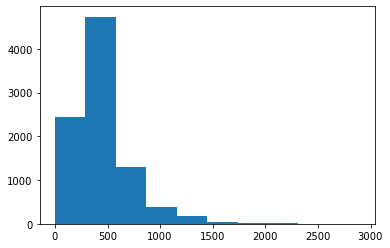

In [10]:
plt.hist(df['Total Claim Amount'], bins=10)

# Show a plot of the response rate by income.

(array([2317.,  161.,  361.,  960.,  711.,  603.,  530.,  492.,  518.,
         510.,  499.,  448.,  361.,  348.,  315.]),
 array([    0. ,  6665.4, 13330.8, 19996.2, 26661.6, 33327. , 39992.4,
        46657.8, 53323.2, 59988.6, 66654. , 73319.4, 79984.8, 86650.2,
        93315.6, 99981. ]),
 <BarContainer object of 15 artists>)

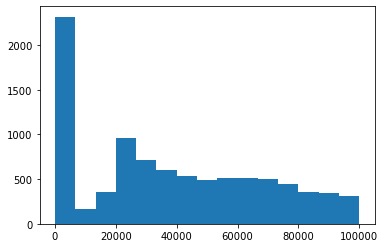

In [11]:
plt.hist(df['Income'], bins=15)

# Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals

In [12]:
numerical = df.select_dtypes(np.number)
categorical = df.select_dtypes(object)

In [24]:
display(numerical)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


# Use seaborn library to construct distribution plots for the numerical variables

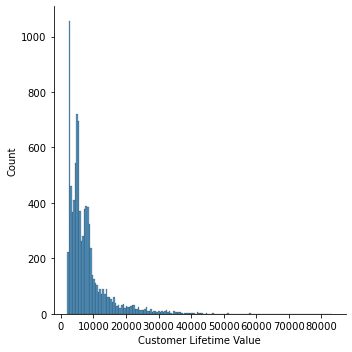

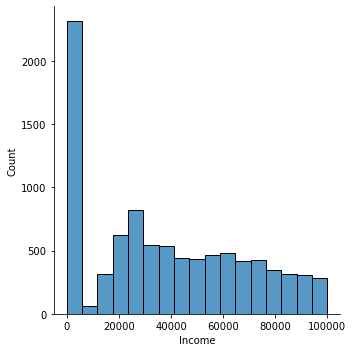

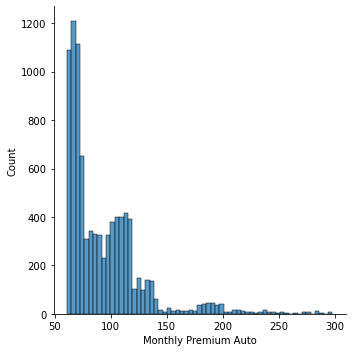

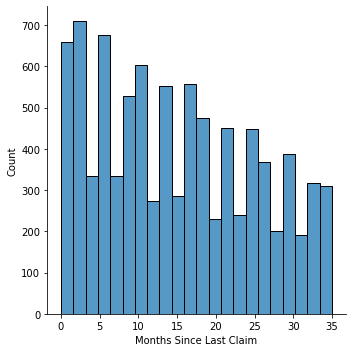

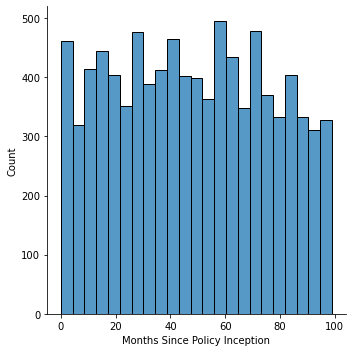

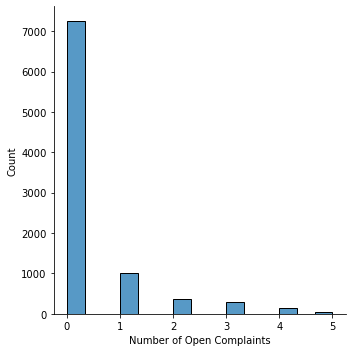

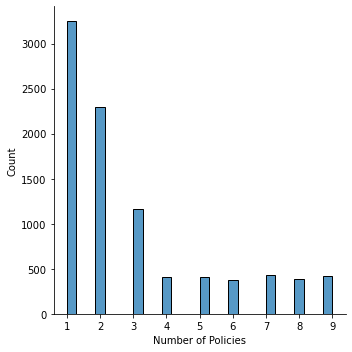

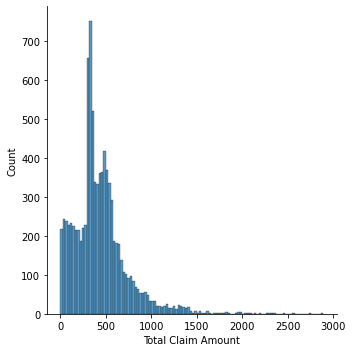

In [14]:
for col in numerical.columns:
    sns.displot(numerical[col])

# Do the distributions for different numerical variables look like a normal distribution 

In [16]:
# UH Ever so slightly, like "Customer lifetime value", "Monthly Premium auto" and "Total Claim Amount", but they are very skewed.

# For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

<AxesSubplot:>

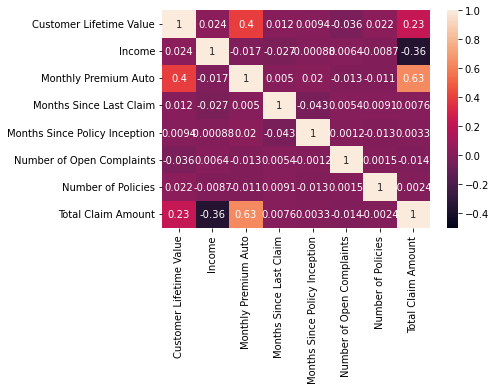

In [17]:
sns.heatmap(df.corr(), vmin=-0.5, vmax=1, annot=True)

In [18]:
#We can see that there is a correlation between Customer Lifetime Value and Monthly Premium Auto
# Also, Total Claim Amount correlates with Customer Lifetime Value and Income, and correlates better with Monthly Premium Auto.

# X-y split and Normalize (numerical), One Hot/Label Encoding (categorical).

In [19]:
# Customer Lifetime Value, Monthly Premium Auto and Income as my numerical features
# 
# Total Claim Amount as my target vector
X = df[["Customer Lifetime Value", "Income", "Monthly Premium Auto"]]
y = df["Total Claim Amount"]

In [20]:
# Divide the dataset into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=0)

# Linear Regression
Train-test split.

Apply linear regression.

In [21]:
#X_train, X_test, y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
#sc_X = StandardScaler()
#X_train = sc_X.fit_transform(X_train) 
#X_test = sc_X.transform(X_test)

In [22]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()